# Lead Scoring Assignment

In [104]:
import pandas as pd
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics

In [2]:
leads = pd.read_csv("Leads.csv")

In [3]:
leads.shape

(9240, 37)

In [4]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Calculating the percentage of missing values in each column

In [6]:
#Calculating the percentage of missing values in each column
missing_values = round(leads.isnull().sum()/len(leads)*100,2).sort_values(ascending=False)
missing_values

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

### Handling missing values and 'Select'

#### Dropping columns that has more than 40% null values

In [7]:
for col in leads:
    if 100*(leads[col].isnull().sum()/len(leads)) > 40:
        leads.drop(col,axis=1,inplace=True)

In [8]:
leads.shape

(9240, 32)

#### Handling the value 'Select' in certain columns. This value is as good as 'Null' so assigning 'Not Selected' to both 'Select' and 'NaN' values

In [9]:
for col in leads:
    if 'Select'  in leads[col].unique():
        leads[col] = leads[col].apply(lambda x :'Not Selected' if x == 'Select' else x)
        leads[col].fillna('Not Selected',inplace=True)

C:\Users\z004au1j\AppData\Local\Temp/ipykernel_24820/115060196.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Select'  in leads[col].unique():


__Checking if all the 'Select' values have been handled__

In [10]:
for col in leads:
    if 'Select'  in leads[col].unique():
        print(col,'\n',leads[col].unique())

C:\Users\z004au1j\AppData\Local\Temp/ipykernel_24820/951015307.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Select'  in leads[col].unique():


In [11]:
#Calculating the percentage of missing values in each column
missing_values = round(leads.isnull().sum()/len(leads)*100,2).sort_values(ascending=False)
## Display columns that have more than 0 null values
missing_values[missing_values>0]

Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
dtype: float64

#### Column: 'Tags'

In [12]:
leads.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

__Imputing the value of 'Other' into columns that have null values in 'Tags' column as adding a any other value might give a different meaning to the tag.__

In [13]:
leads.Tags.fillna('Others',inplace=True)

#### Column: 'What matters most to you in choosing a course'


In [14]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

__Imputing 'Other' into null values in 'What matters most to you in choosing a course' columns as the Other seems like a the best
option since the reason is not specified. And 'Other' is already a value used in the column__

In [15]:
leads['What matters most to you in choosing a course'].fillna('Other',inplace=True)

#### Column: 'What is your current occupation'

In [16]:
leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

__Imputing 'Other' into null values in 'What is your current occupation' columns as the Other seems like a the best
option since the occupation is not specified. And 'Other' is already a value used in the column__

In [17]:
leads['What is your current occupation'].fillna('Other',inplace=True)

#### Column: 'Country'


In [18]:
leads.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [19]:
#Mode value in Country column
leads.Country.mode()

0    India
dtype: object

__Imputing value 'India' for nulls in the Country column as 'India' is the mode value__

In [20]:
leads.Country.fillna(leads.Country.mode()[0],inplace=True)

#### Column: 'Page Views Per Visit'

In [21]:
leads['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

__Imputing the value 0.0 for null values in 'Page Views Per Visit' column as it is the mode value.__

In [22]:
leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].mode()[0],inplace=True)

#### Column:'TotalVisits'

In [23]:
leads['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

__Imputing the value 0.0 for null values in 'TotalVisits' column as it is the mode value.__

In [24]:
leads['TotalVisits'].fillna(leads['TotalVisits'].mode()[0],inplace=True)

#### Column: 'Last Activity'

In [25]:
leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

__Imputing the value 'Email Opened' for null values in 'Last Activity' column as it is the mode value.__

In [26]:
leads['Last Activity'].fillna(leads['Last Activity'].mode()[0],inplace=True)

#### Column: 'Lead Source'

In [27]:
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

__Imputing the value 'Google' for null values in 'Lead Source' column as it is the mode value.__

In [28]:
leads['Lead Source'].fillna(leads['Lead Source'].mode()[0],inplace=True)

In [29]:
leads.shape

(9240, 32)

### Checking null values after  handling them

__No null values are present in the data__

In [30]:
leads.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

## EDA

In [31]:
leads.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Not Selected,Not Selected,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Not Selected,Not Selected,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Not Selected,Not Selected,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Not Selected,Not Selected,No,No,Email Opened


In [32]:
ctgry_features = []
cnts_features = []

## Getting features that have categorical values
for col in leads.columns:
    if leads[col].dtype == 'object':
        ctgry_features.append(col)
    else:
        cnts_features.append(col)

#dropping 'Prospect ID' since it is unique index
ctgry_features.remove('Prospect ID')

#dropping 'Lead Number' since it is unique index
cnts_features.remove('Lead Number')

In [33]:
print(ctgry_features)

['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [34]:
print(cnts_features)

['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


#### Plotting the categorical features

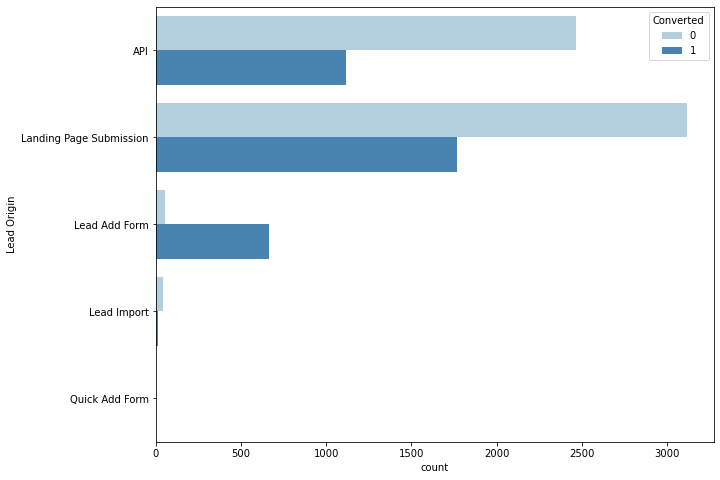

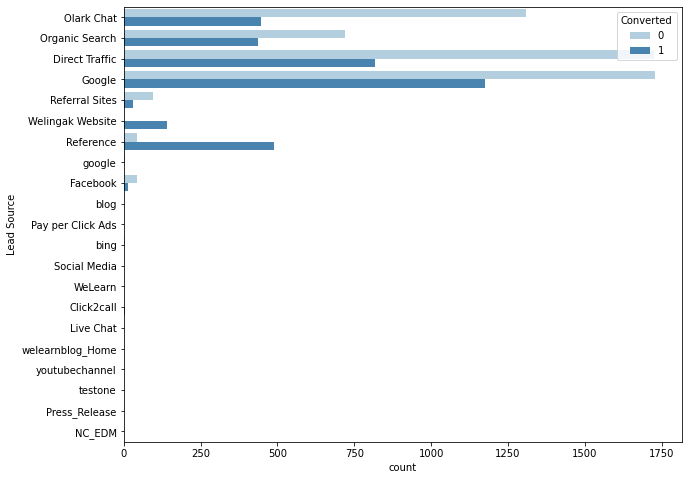

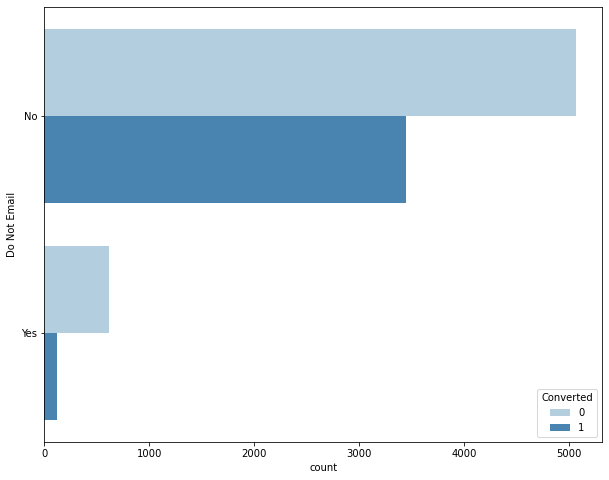

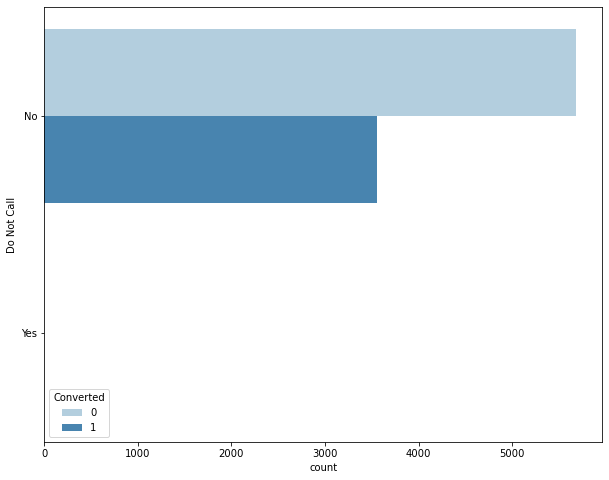

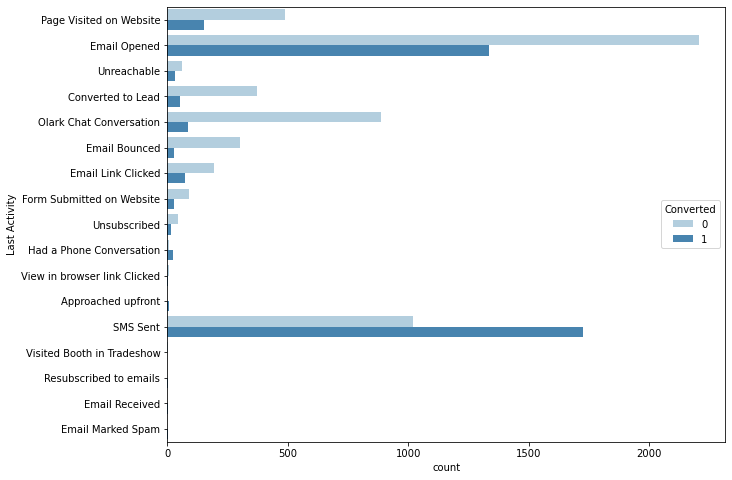

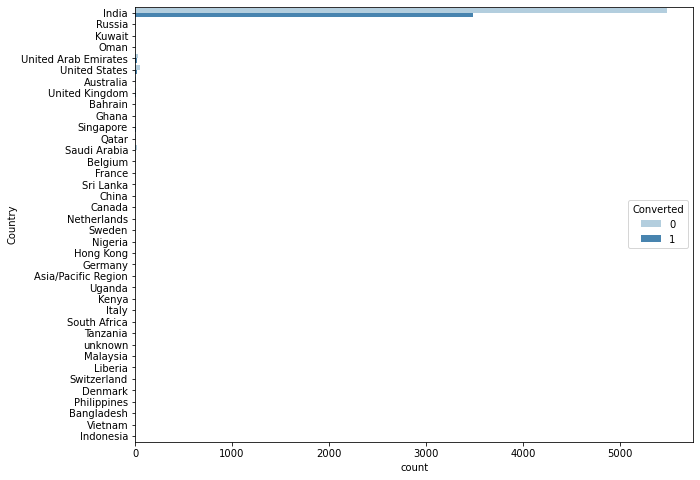

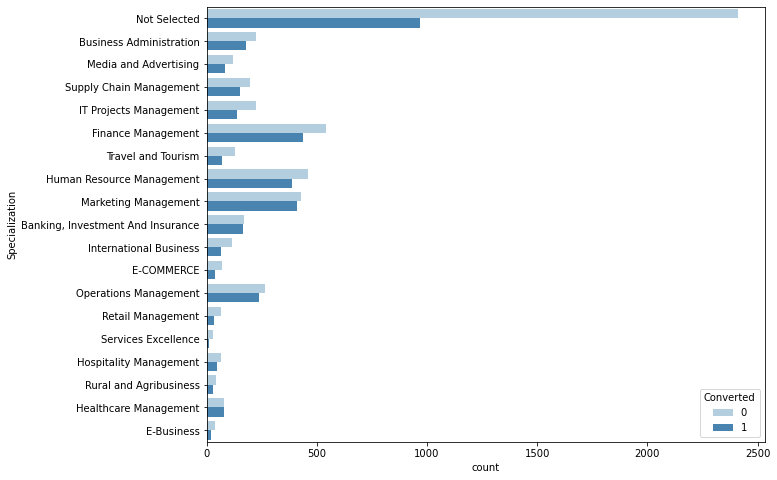

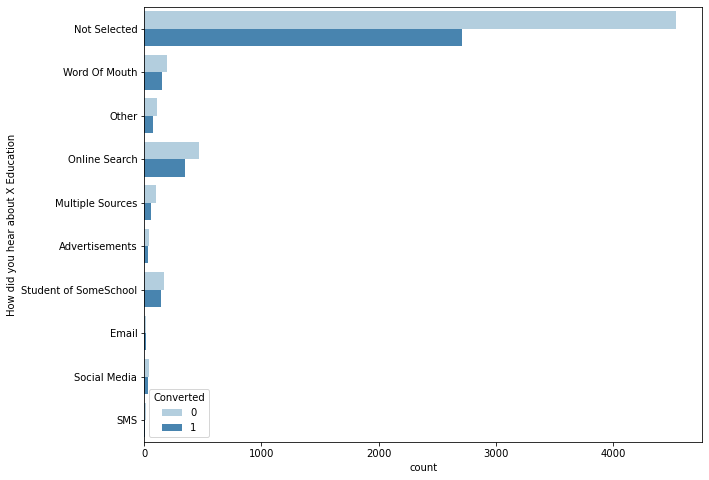

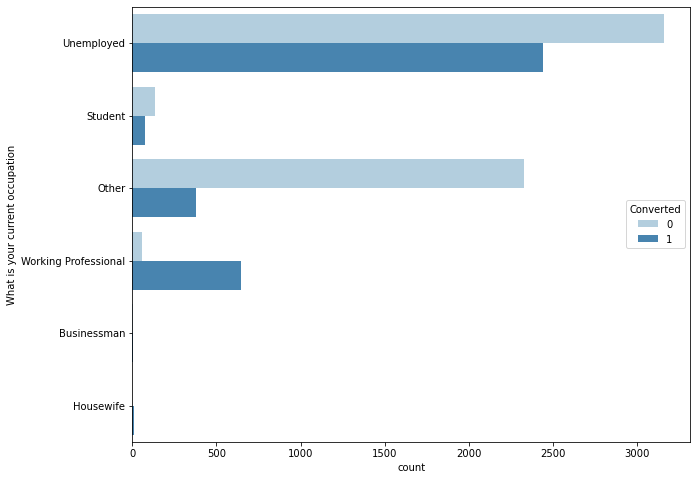

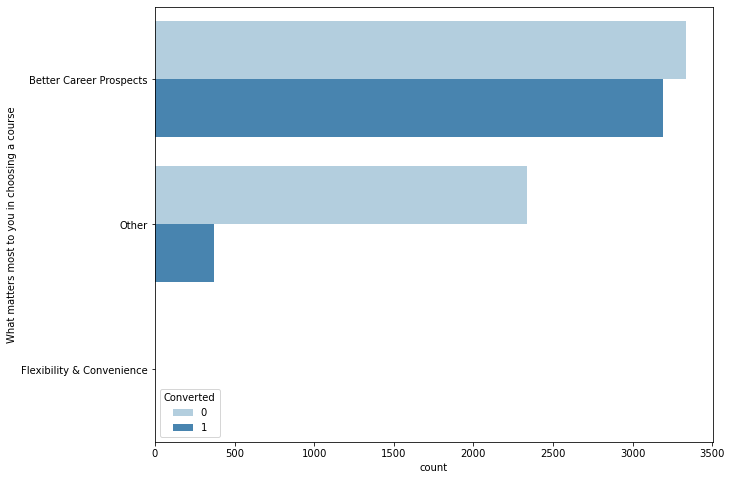

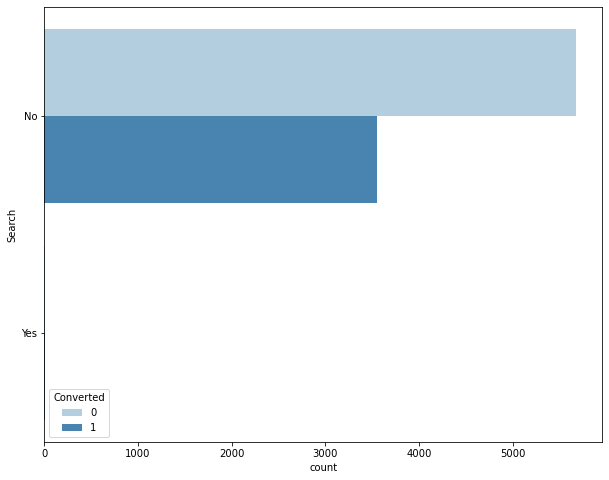

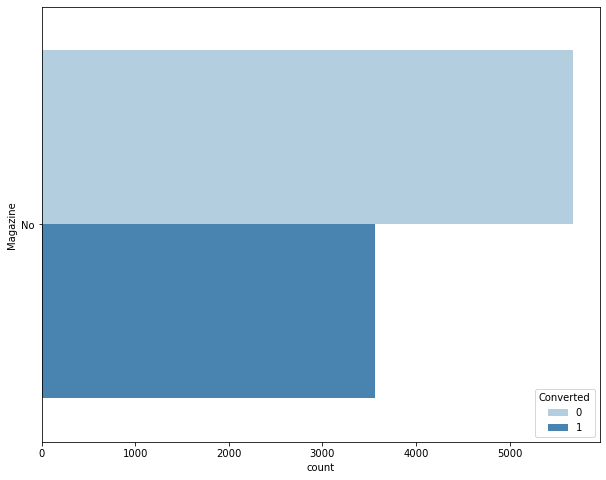

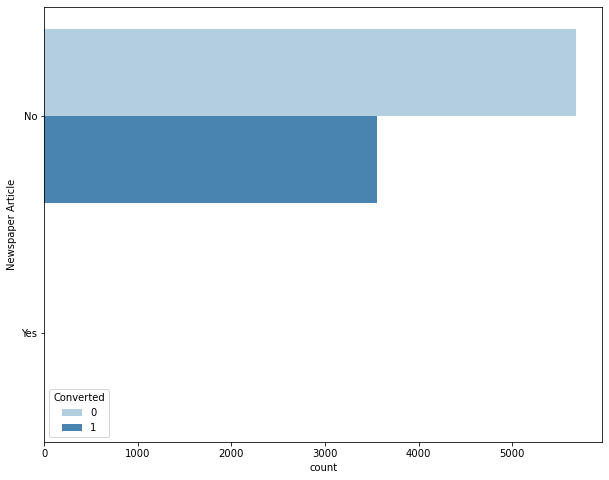

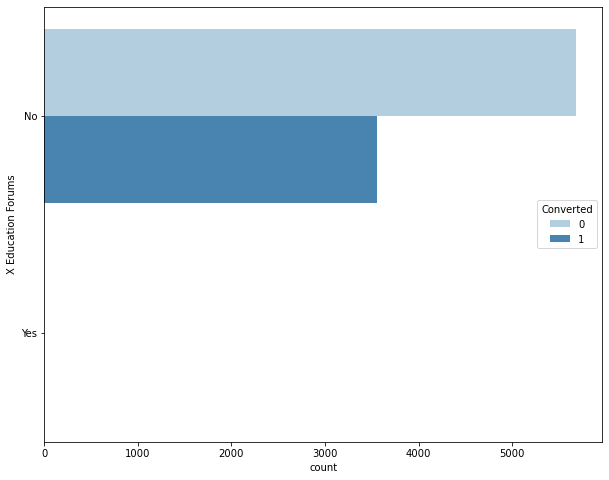

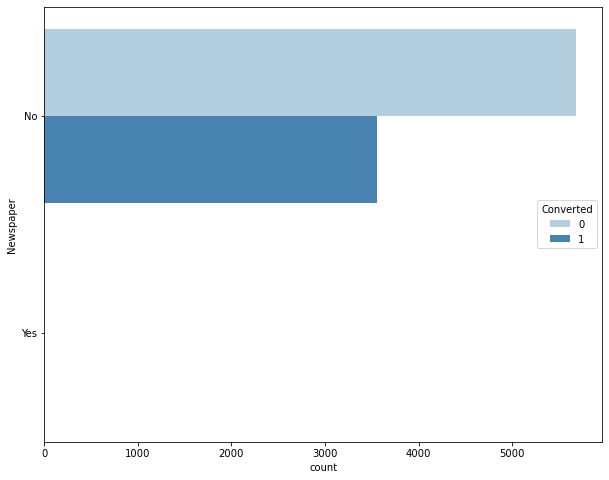

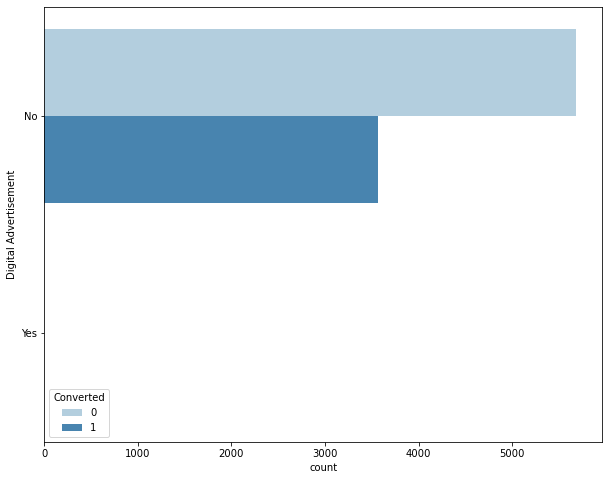

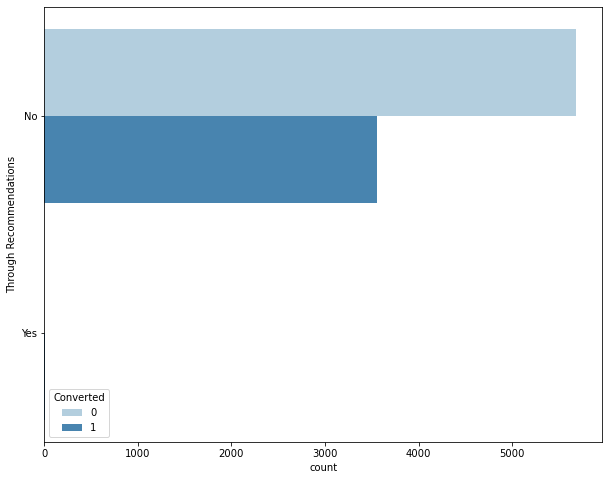

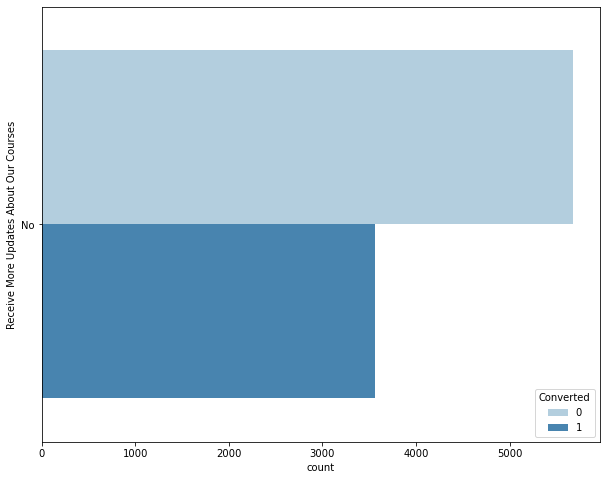

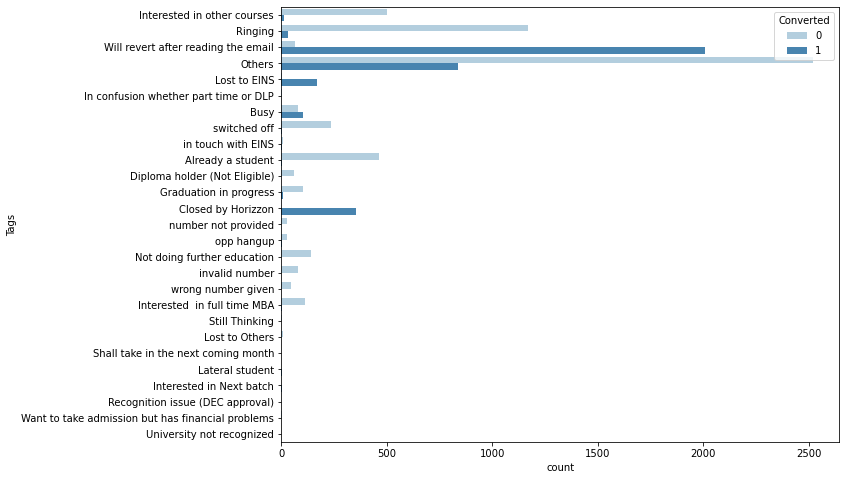

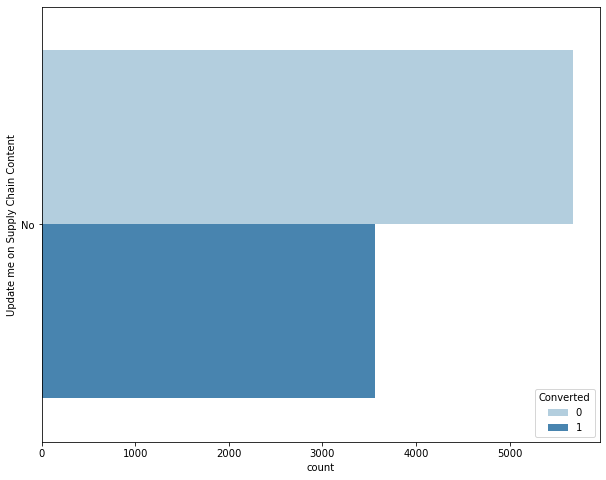

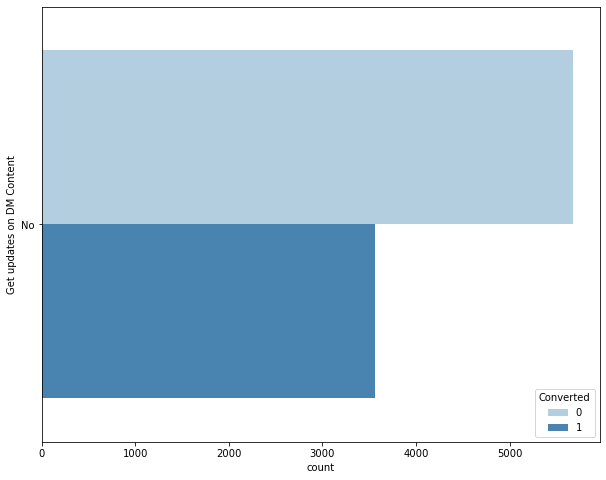

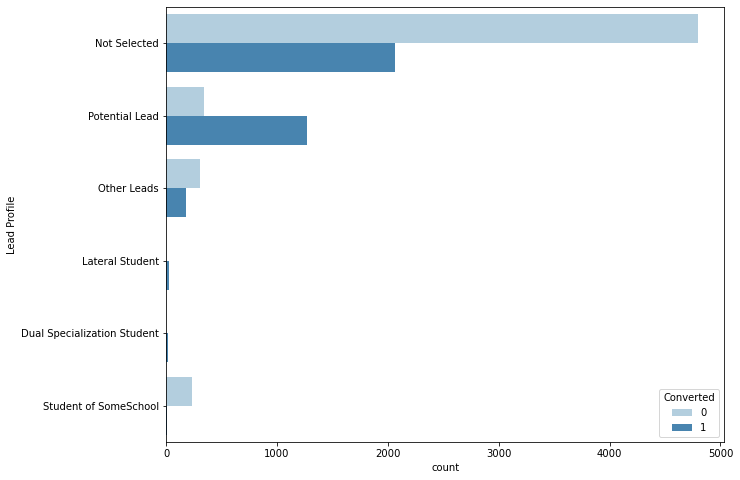

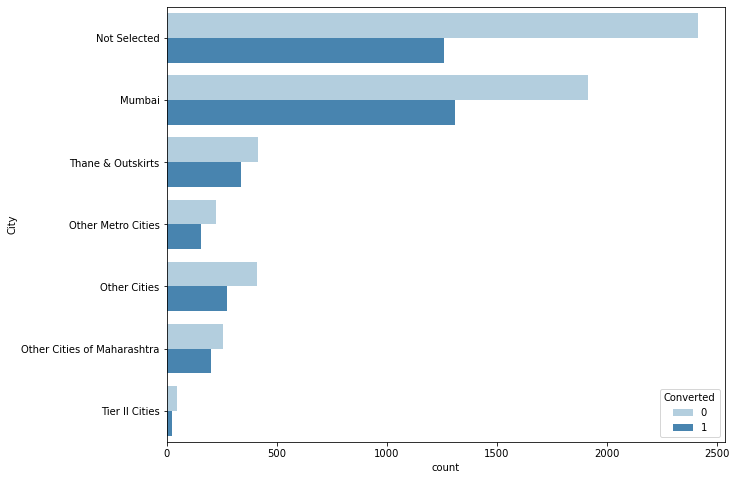

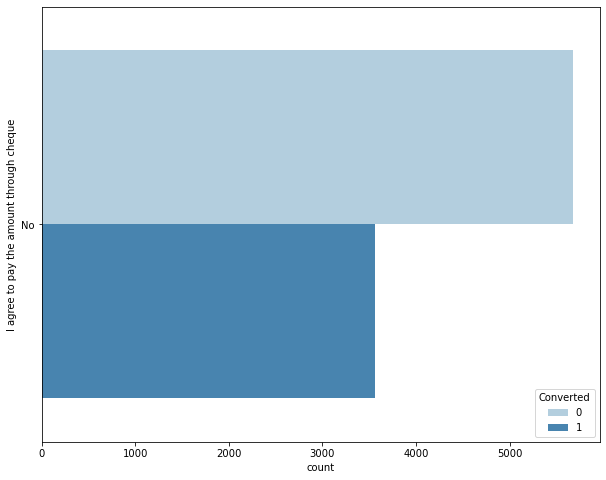

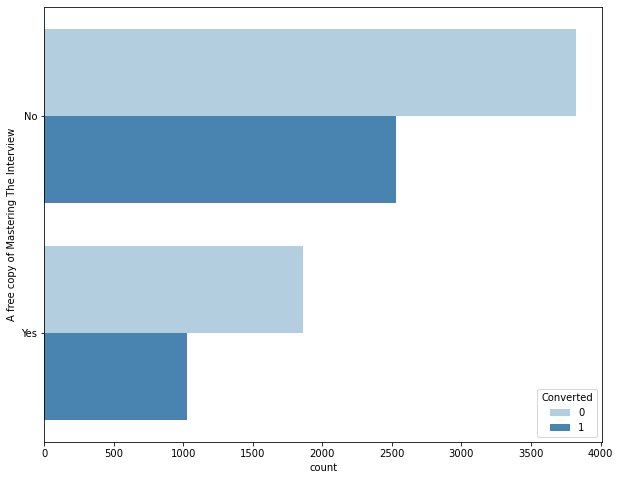

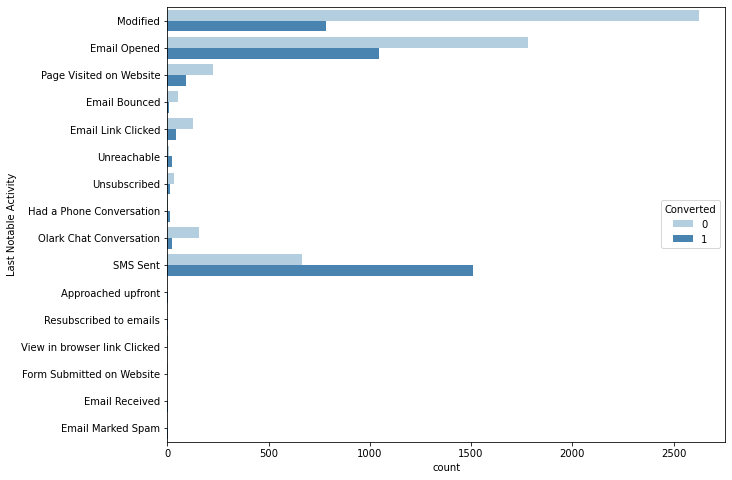

In [35]:
for i in ctgry_features:
    plt.figure(figsize=(10,8))
    sns.countplot(y=i,hue='Converted',data=leads,palette ="Blues")
    plt.show()

## Insights from EDA

### Below columns show some insights into Lead Conversion
__Lead Orign:__ Highest conversion in 'Landing Page Submission' followed by 'API'\
__Lead Source:__ Highest conversion from 'Google' followed by 'Direct Traffic'\
__Last Activity:__ Conversion is hightest amonst students who has 'SMS sent'\
__Country:__ Highest conversion has happened in India\
__Specialization:__ Highest conversion is seen for 'Not selected', this could mean these customers were not employed previously.\
__What is the current occupation:__ This data seems shows the maximum number of conversion happened in 'Unemployed' category\
__Tags:__ Highest conversion is seen in for 'Will revert after reading the email' option.\
__City__: Mumbai has the highest conversion rate.\
__Last Notable Activity__: Highest conversion is seen for SMS sent and Email Opened activities.


### Below columns can be dropped. The reasons are provided against each column:
__Do Not Call:__ No one has opted to be called. Therefore this column will have all the values as 'No'.So this column could be dropped\
__Country :__ Since the number of leads and also conversion percentage across all other countries put together is low compared to India, we can drop the countries column.\
__All the below columns have either only one value or large percentage of values are same.__\
__Search__\
__Magazine__\
__Newspaper Article__\
__X Education Forums__\
__Newspaper__\
__Digital Advertisement__\
__Through Recommendations__\
__Receive More Updates About Our Courses__\
__Update me on Supply Chain Content__\
__Get updates on DM Content__\
__I agree to pay the amount through cheque__

In [36]:
## Plotting the continuous variables

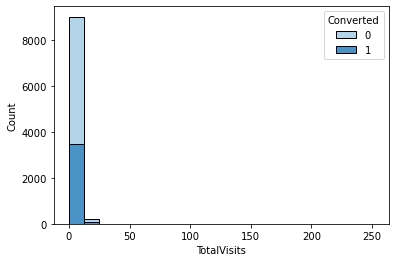

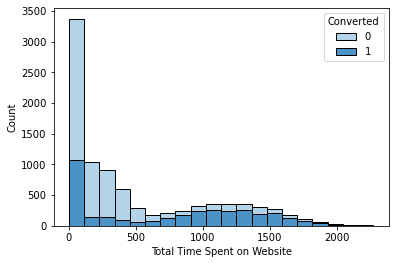

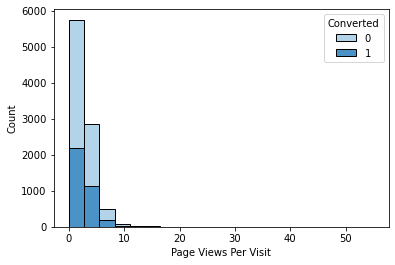

In [37]:
for i in cnts_features:
    if i != 'Converted':
        sns.histplot(data = leads,x = i,hue = 'Converted',alpha = 0.9,multiple = 'stack',bins=20,palette='Blues')
        plt.show()

### Insights dervied from numerical data

__No significant insights for lead conversion can be derived from numerical data__

### Dropping columns based on above analysis

#### Drop 'Prospect ID' since Lead Number is unique

In [38]:
leads['Prospect ID'].nunique()

9240

In [39]:
leads['Lead Number'].nunique()

9240

In [40]:
leads.drop('Prospect ID',axis=1,inplace=True)

In [41]:
#Setting 'Lead Number' as index

In [42]:
leads.set_index('Lead Number',inplace=True)

__Dropping columns that have only one value 'No' in all the rows or has single value that has more the 99% occurence.__

In [43]:
## get columns that have only one value
single_val_cols = []
for col in leads.columns:
    if col != 'Lead Number':
        if (leads[col].nunique() == 1)|(100*(leads[col].value_counts()/len(leads)).sort_values(ascending=False)[0] > 99):
            print('Column:',col,' -- Values: ',leads[col].unique(),' and percentage of :',leads[col].value_counts().sort_values(ascending=False).index[0], ' is ',round((100*(leads[col].value_counts()/len(leads)).sort_values(ascending=False)[0]),2))
            #print('Column: ',col,'--> Values are: ',leads[col].unique(),'% of :',leads[col].value_counts().sort_values(ascending=False)[0], ' is ',(100*(leads[col].value_counts()/len(leads)).sort_values(ascending=False)[0]))
            single_val_cols.append(col)

Column: Do Not Call  -- Values:  ['No' 'Yes']  and percentage of : No  is  99.98
Column: Search  -- Values:  ['No' 'Yes']  and percentage of : No  is  99.85
Column: Magazine  -- Values:  ['No']  and percentage of : No  is  100.0
Column: Newspaper Article  -- Values:  ['No' 'Yes']  and percentage of : No  is  99.98
Column: X Education Forums  -- Values:  ['No' 'Yes']  and percentage of : No  is  99.99
Column: Newspaper  -- Values:  ['No' 'Yes']  and percentage of : No  is  99.99
Column: Digital Advertisement  -- Values:  ['No' 'Yes']  and percentage of : No  is  99.96
Column: Through Recommendations  -- Values:  ['No' 'Yes']  and percentage of : No  is  99.92
Column: Receive More Updates About Our Courses  -- Values:  ['No']  and percentage of : No  is  100.0
Column: Update me on Supply Chain Content  -- Values:  ['No']  and percentage of : No  is  100.0
Column: Get updates on DM Content  -- Values:  ['No']  and percentage of : No  is  100.0
Column: I agree to pay the amount through che

In [44]:
leads.drop(single_val_cols,axis=1,inplace=True)

In [45]:
### Dropping Country column. Since more than 96% of 

In [46]:
leads.Country.value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [47]:
100*leads.Country.value_counts()[0]/len(leads)

96.89393939393939

In [48]:
leads.drop('Country',axis=1,inplace=True)

#### Converting Yes and No values in colums to 1 and 0 respectively

In [49]:
## Getting columns that have 'Yes' or 'No' values

binary_cols = []

for col in leads.columns:
    if leads[col].unique().any() in ['Yes','No']:
        binary_cols.append(col)
        
for cols in binary_cols:
    print(cols,' \n****************\n',leads[cols].value_counts(),"\n")

Do Not Email  
****************
 No     8506
Yes     734
Name: Do Not Email, dtype: int64 

A free copy of Mastering The Interview  
****************
 No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64 



In [50]:
def binary_mapping(x):
    return x.map({'Yes':1,'No':0})
    
leads[binary_cols] = leads[binary_cols].apply(binary_mapping)

### Checking for outliers in the retained numerical columns

In [51]:
leads.describe(percentiles = [0.0,0.05,0.10,0.25,0.50,0.75,0.8,0.9,0.95,0.99])

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.079437,0.385390,3.394156,487.698268,2.327787,0.312554
std,0.270435,0.486714,4.836682,548.021466,2.164258,0.463559
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000
50%,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000
75%,0.000000,1.000000,5.000000,936.000000,3.000000,1.000000


__'TotalVisits','Total Time Spent on Website' and 'Page Views Per Visit' have outliers but we will not drop any rows as this info may be relevant for analysis__

### Analysing  columns with categorical values to consolidate the categories based on value relevance or to remove columns that are not relevant.

In [52]:
ctgry_cols = ['Lead Origin','Lead Source','Last Activity','Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Tags','Lead Profile','City','Last Notable Activity']

In [53]:
for col in ctgry_cols:
    print('Column: ',col,'\n*******\n',leads[col].value_counts(),'\n__________________\n')

Column:  Lead Origin 
*******
 Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64 
__________________

Column:  Lead Source 
*******
 Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64 
__________________

Column:  Last Activity 
*******
 Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversa

### Based on the values in each of the columns


__1.Following values in 'Lead Source' column can be consolidate into 'Others' since they are less in number and are not significant individually.__\
Facebook--               55\
bing      --              6\
google    --              5\
Click2call      --        4\
Press_Release   --        2\
Social Media  --          2\
Live Chat   --            2\
youtubechannel --         1\
testone   --              1\
Pay per Click Ads --      1\
welearnblog_Home   --     1\
WeLearn     --            1\
blog   --                 1\
NC_EDM     --             1

__2.Following values in 'Last Activity' column can be consolidate into 'Others' since they are less in number and are not significant individually.__\ 

Approached upfront --                9\
View in browser link Clicked --      6\
Email Received           --          2\
Email Marked Spam         --         2\
Visited Booth in Tradeshow --        1\
Resubscribed to emails       --      1\

__2.What matters most to you in choosing a course : This column can be dropped as the only significant value is 'Better Career Prospects'. There are no other meaningful values in the column__\
__3.Tags: Tags column can be removed as it is assigned to the customer as status of the lead__\
__4.Last Notable Activity: This column can be dropped as it has the same meaning as the 'Last Activity' column as mentioned in the data dictionary.__


In [54]:
## Replacing insignificant values in 'Lead Source' column to 'Others'

In [55]:
leads['Lead Source'].replace(['Facebook','bing','google','Click2call','Press_Release','Social Media','Live Chat','youtubechannel','testone','Pay per Click Ads','welearnblog_Home','WeLearn','blog','NC_EDM'],'Others',inplace=True)

In [56]:
leads['Last Activity'].replace(['Approached upfront','View in browser link Clicked','Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'],'Others',inplace=True)

In [57]:
leads[(leads['Lead Source'] == 'Others') | (leads['Last Activity'] == 'Others')]

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,,,,,
659833,API,Olark Chat,0,0,0.0,0,0.00,Others,Finance Management,Not Selected,Unemployed,Better Career Prospects,Interested in other courses,Other Leads,Not Selected,0,Modified
659094,Landing Page Submission,Others,0,0,7.0,106,3.50,Page Visited on Website,Not Selected,Multiple Sources,Other,Other,Others,Not Selected,Other Cities,0,Modified
658432,Lead Add Form,Reference,0,1,0.0,785,0.00,Others,Not Selected,Not Selected,Unemployed,Better Career Prospects,Will revert after reading the email,Not Selected,Not Selected,0,Modified
657971,Landing Page Submission,Others,0,0,5.0,306,5.00,Page Visited on Website,Not Selected,Student of SomeSchool,Other,Other,Others,Not Selected,Other Cities,0,Modified
657426,Landing Page Submission,Others,0,0,5.0,1008,5.00,Page Visited on Website,Not Selected,Not Selected,Other,Other,Others,Not Selected,Not Selected,0,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588806,Landing Page Submission,Google,0,1,6.0,761,3.00,Others,Human Resource Management,Social Media,Working Professional,Better Career Prospects,Will revert after reading the email,Not Selected,Mumbai,0,Email Received
588479,Landing Page Submission,Others,0,0,3.0,164,3.00,Page Visited on Website,Travel and Tourism,Not Selected,Unemployed,Better Career Prospects,Interested in other courses,Not Selected,Other Cities,1,Modified
587905,Lead Add Form,Reference,1,1,0.0,0,0.00,Others,Human Resource Management,Not Selected,Unemployed,Better Career Prospects,Will revert after reading the email,Potential Lead,Not Selected,0,Email Marked Spam


In [58]:
## Dropping columns 'What matters most to you in choosing a course','Last Notable Activity' and 'Tags'

leads.drop(['What matters most to you in choosing a course','Last Notable Activity','Tags'],axis=1,inplace=True)

In [59]:
leads.shape

(9240, 14)

## Creating dummies for the categorical variables.

In [60]:
dummy = pd.get_dummies(leads[['Lead Origin','Lead Source', 'Last Activity','Specialization','How did you hear about X Education','What is your current occupation','Lead Profile','City']],drop_first = True)

In [61]:
dummy

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Selected,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Not Selected,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Profile_Lateral Student,Lead Profile_Not Selected,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Not Selected,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
660728,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
660727,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
660719,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
660681,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579564,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
579546,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
579545,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [62]:
leads_encoded = leads.drop(['Lead Origin','Lead Source', 'Last Activity','Specialization','How did you hear about X Education','What is your current occupation','Lead Profile','City'],axis=1)

In [63]:
leads_encoded = pd.concat([leads_encoded,dummy],axis=1)

In [64]:
leads_encoded.shape

(9240, 71)

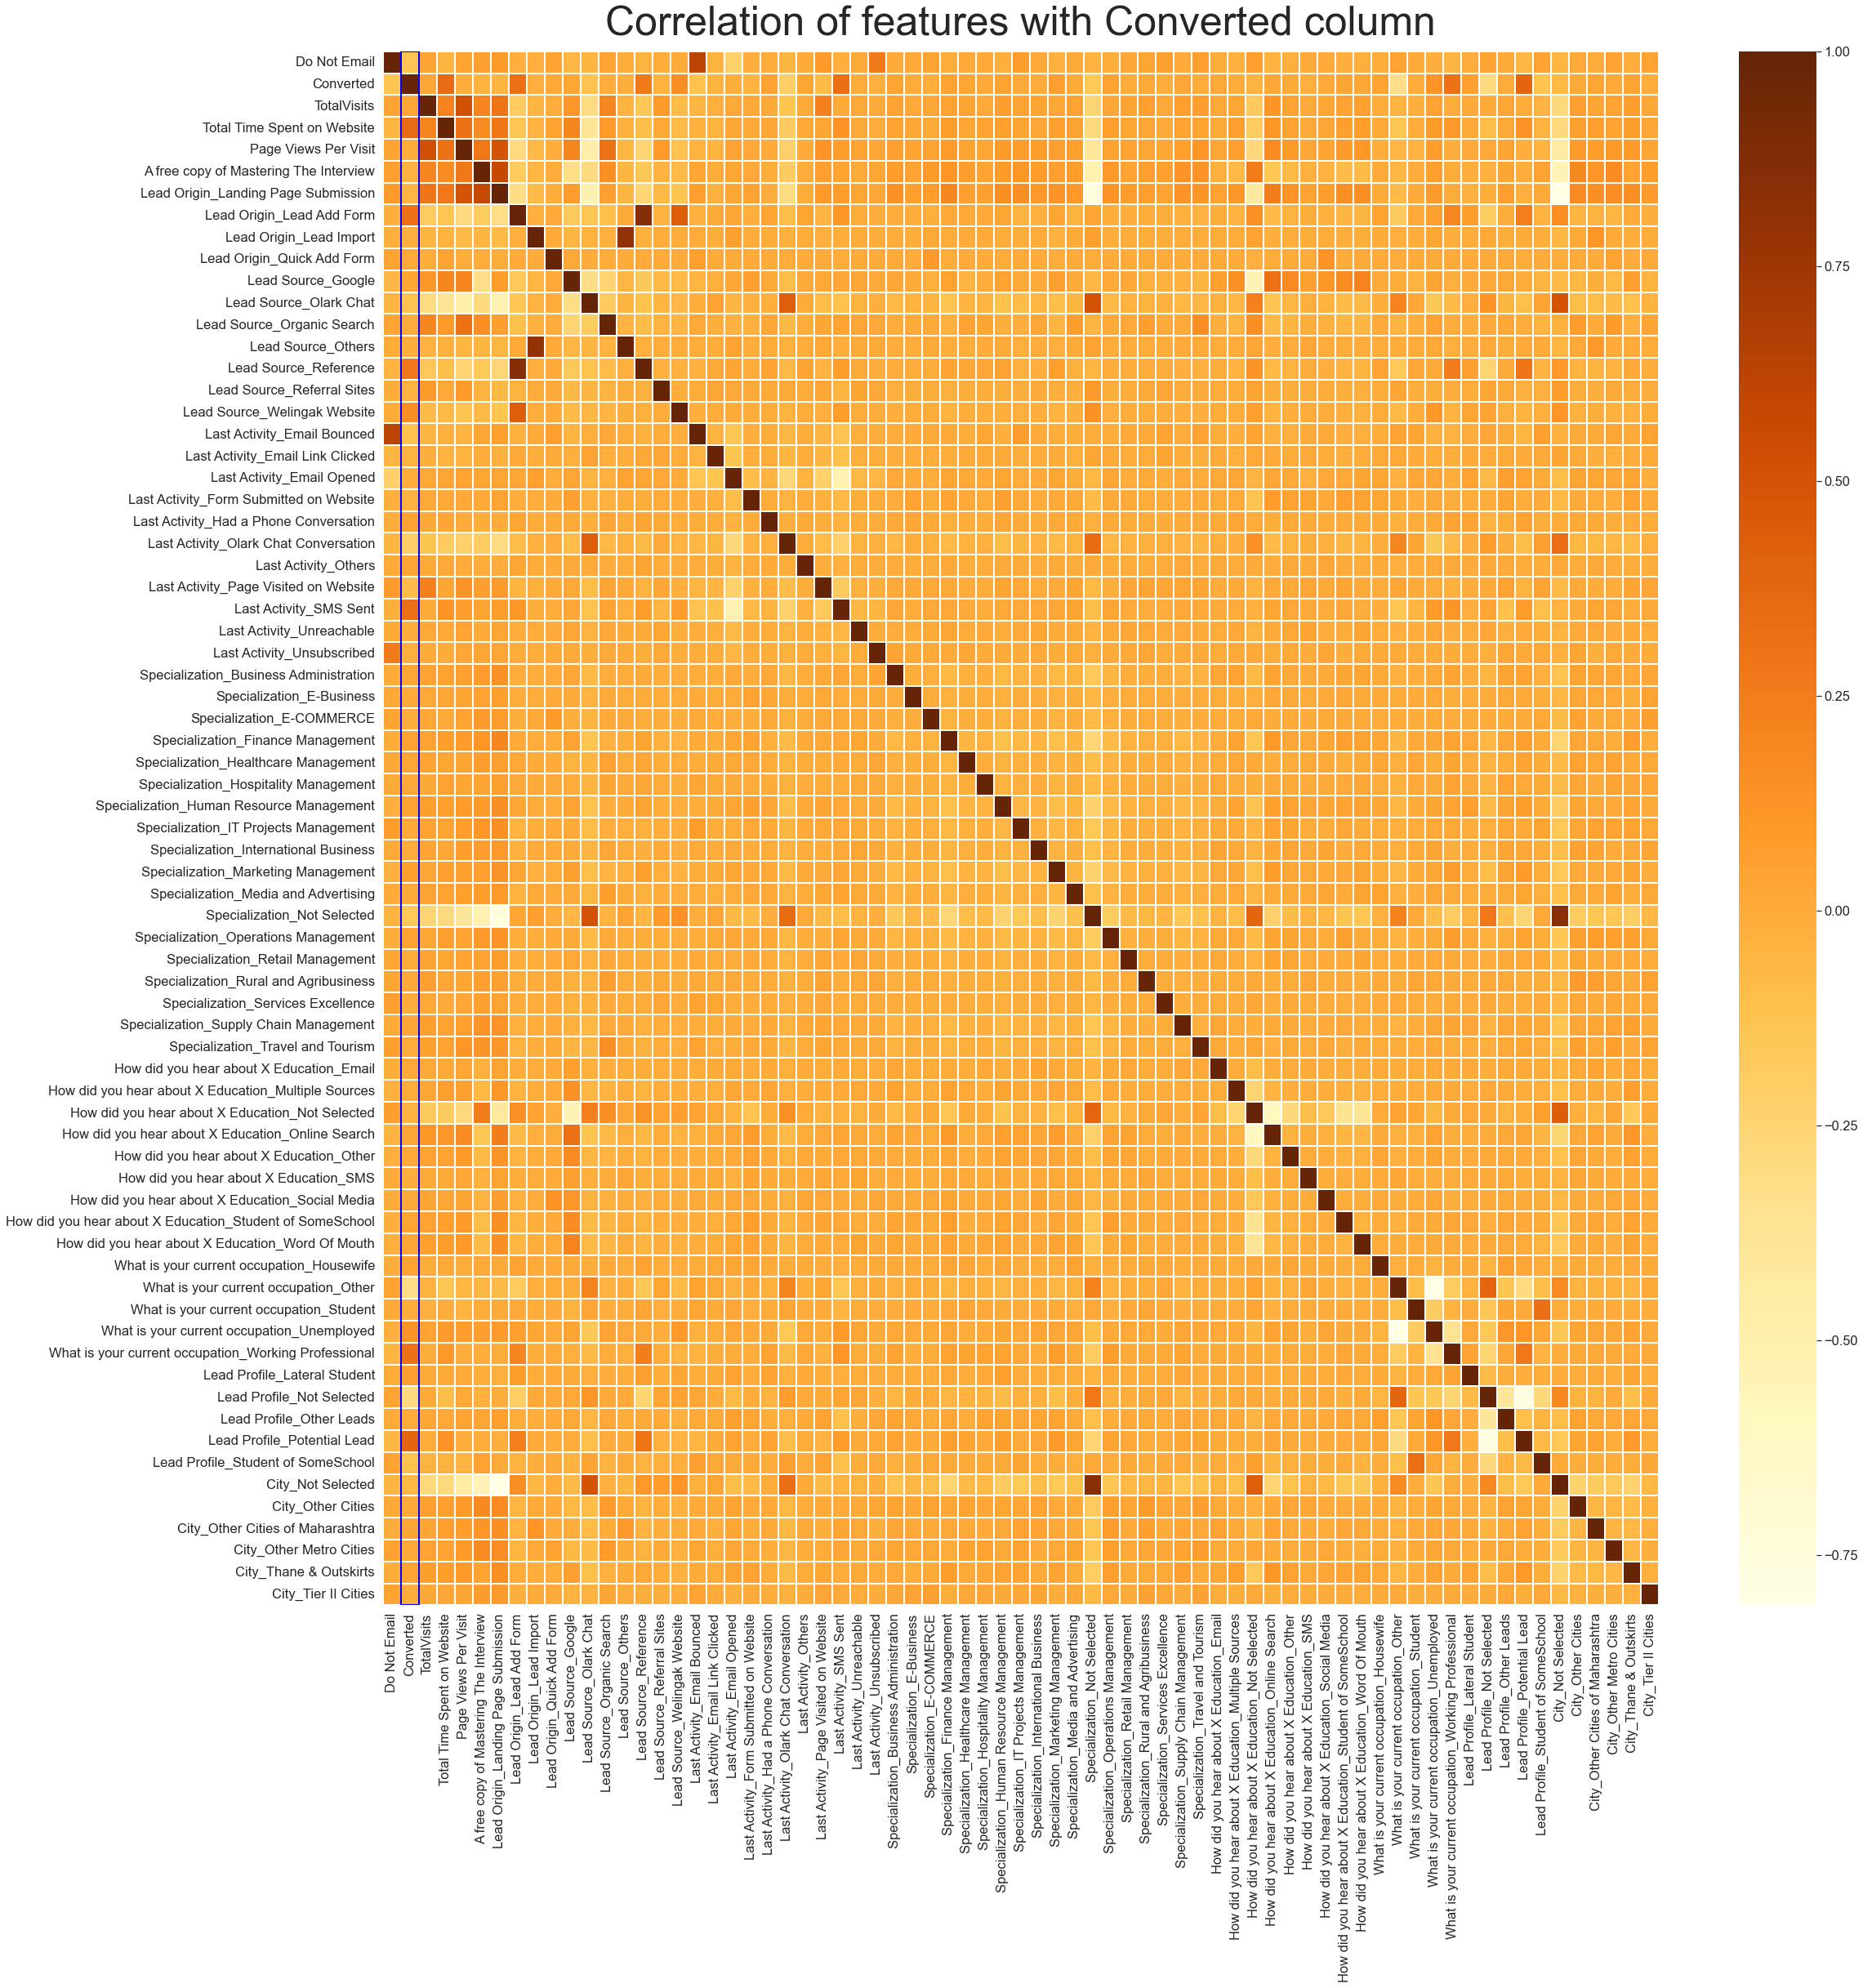

In [65]:
## creating heatmap
plt.figure(figsize = (35,35))
sns.set(font_scale=1.5)
ax = sns.heatmap(leads_encoded.corr(),cmap='YlOrBr',annot_kws={'fontsize':30},linewidths=0.1, linecolor='white')
ax.add_patch(Rectangle((1,0), 1, leads_encoded.shape[1], fill=False, edgecolor='blue', lw=2))
plt.title('Correlation of features with Converted column', fontsize = 50,pad=20) # title with fontsize 20
plt.show()

## Insights from the correlation heatmap

__From the above correlation matrix we can make the below inference__\
__1. The Target Converted is highly correlated to the below features.__\
Total time spent on Website\
Lead Origin_Lead Add Form\
Lead Source_Reference\
Lead Source_Welingak Website\
Last Activity_SMSSent\
What is you current occupation_Working Professional\
Lead Profile_Potential Lead\

__2. We will not drop any columns based on the correlations, we can do this after creating the inital model.__

## Building the model

### Test train split

In [66]:
## Creating the training and test data
train_df,test_df = train_test_split(leads_encoded,train_size=0.7,random_state=146)

In [67]:
## X_train and y_train
X_train = train_df.drop('Converted',axis=1)
y_train = train_df['Converted']

## X_test and y_test

X_test = test_df.drop('Converted',axis=1)
y_test = test_df['Converted']

In [68]:
X_train.head(2)

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Selected,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Not Selected,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Profile_Lateral Student,Lead Profile_Not Selected,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Not Selected,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
613099,0,3.0,458,3.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
647994,1,0.0,574,0.0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


### Feature Scaling

In [69]:
scaler = MinMaxScaler()

In [70]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [71]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Selected,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Not Selected,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Profile_Lateral Student,Lead Profile_Not Selected,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Not Selected,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
613099,0,0.026087,0.203285,0.054545,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
647994,1,0.000000,0.254771,0.000000,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
658071,0,0.017391,0.806036,0.036364,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
592424,0,0.008696,0.175766,0.018182,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
607745,0,0.017391,0.064359,0.036364,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0


In [72]:
X_train.shape

(6468, 70)

In [73]:
## Correlations

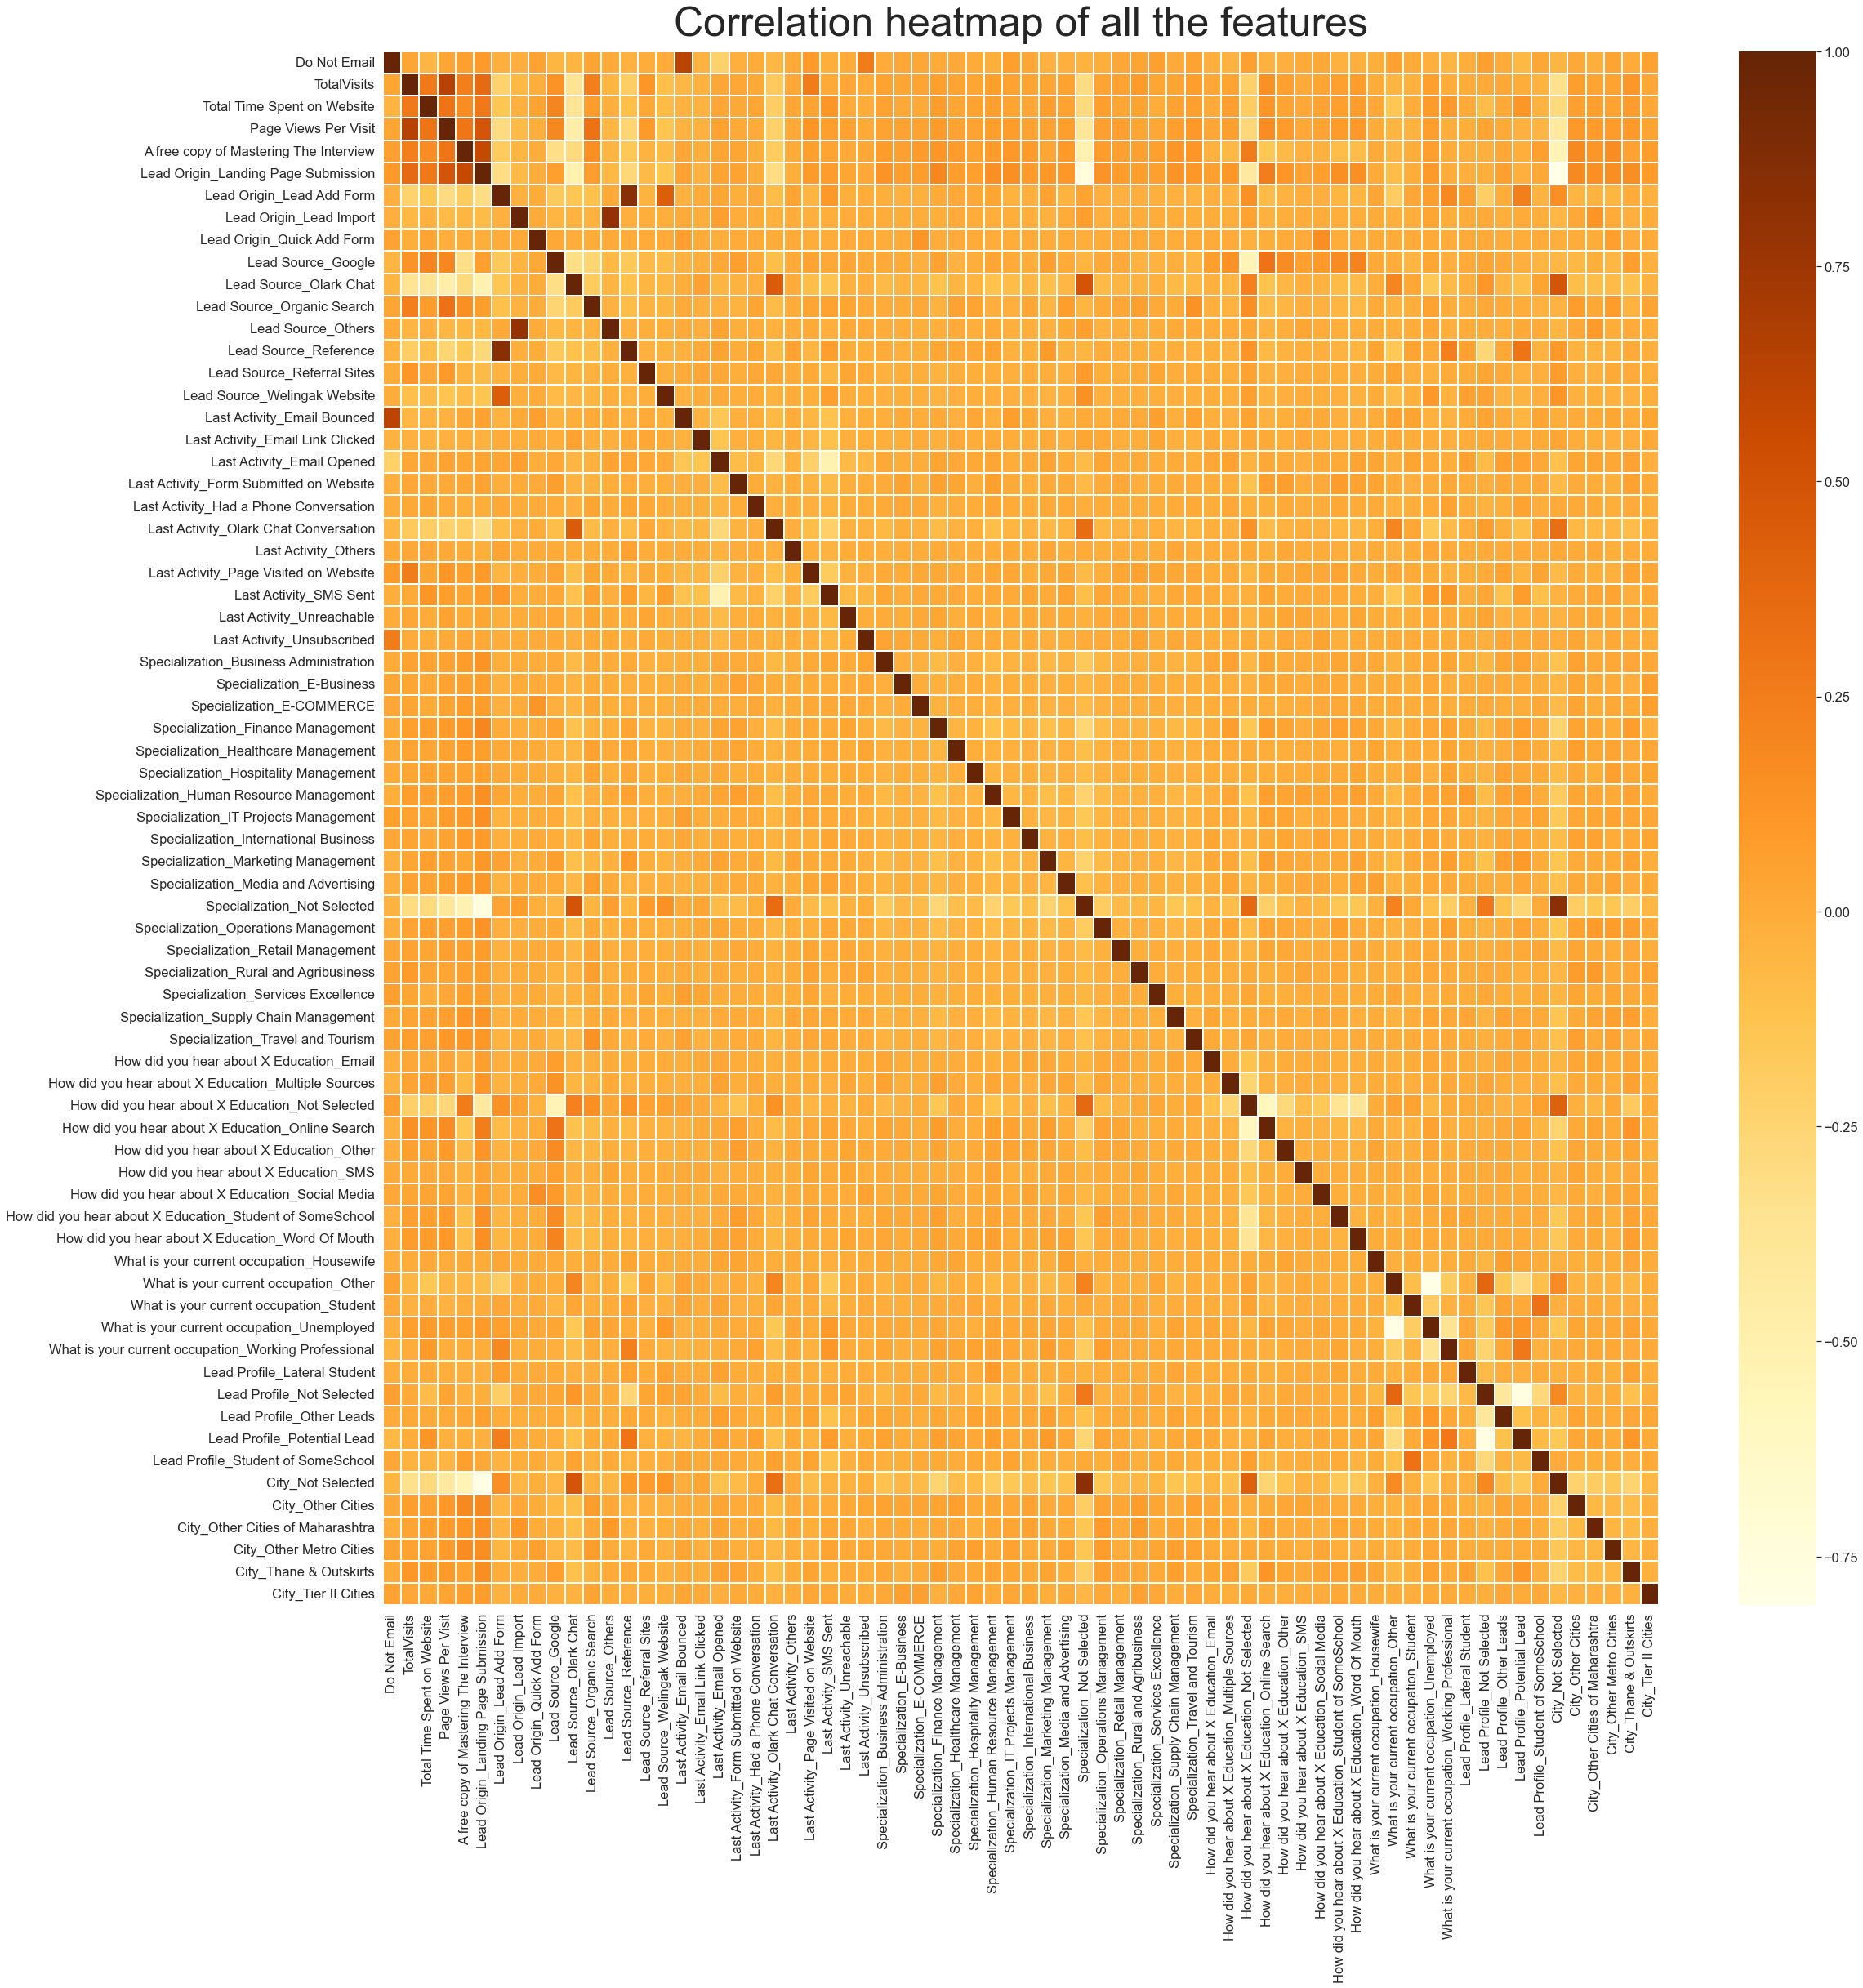

In [74]:
## creating heatmap
plt.figure(figsize = (35,35))
sns.set(font_scale=1.5)
ax = sns.heatmap(X_train.corr(),cmap='YlOrBr',annot_kws={'fontsize':30},linewidths=0.1, linecolor='white')
plt.title('Correlation heatmap of all the features', fontsize = 50,pad=20) # title with fontsize 20
plt.show()

## Model building

## Logistic Regression model
#### We are choosing a logistic regression model since the Target variable is binary. Hence this becomes a Classification problem

In [86]:
## Logisting regression model
## let us first create with all the features and see the outcome.

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)),family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6397
Model Family:                Binomial   Df Model:                           70
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2429.9
Date:                Sat, 24 Dec 2022   Deviance:                       4859.8
Time:                        18:48:48   Pearson chi2:                 7.85e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                       21.6644    2.9e+04      0.001      0.999   -5.68e+04    5.69e+04
Do Not Email                                                -1.3513      0.215     -6.298      0.000      -1.772      -0.931
TotalVisits                                                  5.6590      1.306      4.334      0.000       3.100       8.218
Total Time Spent on Website                                  4.5498      0.173     26.250      0.000       4.210       4.890
Page Views Per Visit                                        -3.0486      1.408     -2.166      0.030      -5.808      -0.289
A free copy of Mastering The Interview                      -0.0304      0.143     -0.212      0.832      -0.311       0.251
Lead Origin_Landing Page Submission                         -0.7812      0.173     -4.516      0.000      -1.120      -0.442
Lead Origin_Lead Add Form                                    2.9003      0.552      5.255      0.000       1.819       3.982
Lead Origin_Lead Import                                     -0.6359      0.847     -0.751      0.453      -2.296       1.024
Lead Origin_Quick Add Form                                  23.0544   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Google                                           0.3030      0.129      2.353      0.019       0.051       0.555
Lead Source_Olark Chat                                       1.2620      0.173      7.281      0.000       0.922       1.602
Lead Source_Organic Search                                   0.1438      0.133      1.084      0.278      -0.116       0.404
Lead Source_Others                                           0.5097      0.723      0.705      0.481      -0.908       1.927
Lead Source_Reference                                       -0.2345      0.590     -0.398      0.691      -1.390       0.921
Lead Source_Referral Sites                                  -0.1309      0.368     -0.356      0.722      -0.852       0.590
Lead Source_Welingak Website                                 3.4713      1.151      3.016      0.003       1.215       5.727
Last Activity_Email Bounced                                  0.5302      0.426      1.243      0.214      -0.306       1.366
Last Activity_Email Link Clicked                             0.8232      0.306      2.691      0.007       0.224       1.423
Last Activity_Email Opened                                   1.0969      0.223      4.914      0.000       0.659       1.534
Last Activity_Form Submitted on Website                      0.1682      0.430      0.391      0.696      -0.675       1.011
Last Activity_Had a Phone Conversation                       1.5421      0.623     

__From the above summary we can see that a lot of the features are insignificant based on the p-value. So we need to narrow down our analysis to a few significant features. For this purpose we can use RFE.__

## Feature selection using RFE

In [90]:
logreg = LogisticRegression()
rfe = RFE(logreg,15)
rfe = rfe.fit(X_train,y_train)

C:\Users\z004au1j\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004au1j\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

In [91]:
rfe.support_

array([ True,  True,  True, False, False, False,  True, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False,  True,  True,  True,  True, False,
        True, False, False, False, False, False, False])

In [93]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 12),
 ('A free copy of Mastering The Interview', False, 56),
 ('Lead Origin_Landing Page Submission', False, 7),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 28),
 ('Lead Origin_Quick Add Form', False, 27),
 ('Lead Source_Google', False, 20),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 39),
 ('Lead Source_Others', False, 29),
 ('Lead Source_Reference', False, 37),
 ('Lead Source_Referral Sites', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 41),
 ('Last Activity_Email Link Clicked', False, 13),
 ('Last Activity_Email Opened', False, 10),
 ('Last Activity_Form Submitted on Website', False, 45),
 ('Last Activity_Had a Phone Conversation', False, 9),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', False, 2),
 ('Last 

In [94]:
# Columns selected by RFE
col = X_train.columns[rfe.support_]

In [98]:
# The columns that have been dropped by RFE
drop_cols = X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects M

#### Creating model with RFE features

#### Model1

In [103]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train[col])),family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2502.1
Date:                Sat, 24 Dec 2022   Deviance:                       5004.3
Time:                        19:08:48   Pearson chi2:                 7.23e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0420      0.112     -9.288      0.000      -1.262      -0.822
Do Not Email                                            -1.4292      0.167     -8.538      0.000      -1.757      -1.101
TotalVisits                                              4.2386      1.032      4.107      0.000       2.216       6.261
Total Time Spent on Website                              4.5562      0.168     27.091      0.000       4.227       4.886
Lead Origin_Lead Add Form                                3.1555      0.198     15.913      0.000       2.767       3.544
Lead Source_Olark Chat                                   1.5285      0.116     13.121      0.000       1.300       1.757
Lead Source_Welingak Website                             3.4432      1.026      3.355      0.001       1.432       5.455
Last Activity_Olark Chat Conversation                   -1.3123      0.172     -7.612      0.000      -1.650      -0.974
Last Activity_SMS Sent                                   1.3249      0.078     17.065      0.000       1.173       1.477
What is your current occupation_Housewife               23.0577   2.73e+04      0.001      0.999   -5.35e+04    5.36e+04
What is your current occupation_Other                   -0.8732      0.091     -9.594      0.000      -1.052      -0.695
What is your current occupation_Working Professional     2.0887      0.182     11.453      0.000       1.731       2.446
Lead Profile_Lateral Student                            21.8309   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Profile_Not Selected                               -1.5951      0.101    -15.844      0.000      -1.792      -1.398
Lead Profile_Other Leads                                -1.2488      0.164     -7.628      0.000      -1.570      -0.928
Lead Profile_Student of SomeSchool                      -4.0362      0.486     -8.308      0.000      -4.988      -3.084
========================================================================================================================
"""

In [113]:
#Checking VIF
#creating a funciton to get VIF

def get_VIF(col):
    vif = pd.DataFrame()
    vif['Features'] = X_train[col].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF',ascending=False)
    return vif

In [114]:
get_VIF(col)

,Features,VIF
12,Lead Profile_Not Selected,3.42
1,TotalVisits,1.93
2,Total Time Spent on Website,1.92
9,What is your current occupation_Other,1.77
4,Lead Source_Olark Chat,1.76
7,Last Activity_SMS Sent,1.52
6,Last Activity_Olark Chat Conversation,1.47
3,Lead Origin_Lead Add Form,1.43
5,Lead Source_Welingak Website,1.30
10,What is your current occupation_Working Profes...,1.19


__From the above model summary and VIF we can see that 'What is your current occupation_Housewife' and 'Lead Profile_Lateral Student' are insignificant as they 
have a p-value of 0.999. Dropping 'What is your current occupation_Housewife' and then assessing the model again.

In [115]:
col = col.drop('What is your current occupation_Housewife')

In [117]:
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Lead Profile_Lateral Student', 'Lead Profile_Not Selected',
       'Lead Profile_Other Leads', 'Lead Profile_Student of SomeSchool'],
      dtype='object')

#### Model2

In [120]:
logm2 = sm.GLM?

In [122]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train[col])),family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2505.5
Date:                Sat, 24 Dec 2022   Deviance:                       5010.9
Time:                        20:11:21   Pearson chi2:                 7.26e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0373      0.112     -9.255      0.000      -1.257      -0.818
Do Not Email                                            -1.4330      0.167     -8.558      0.000      -1.761      -1.105
TotalVisits                                              4.2094      1.031      4.084      0.000       2.189       6.230
Total Time Spent on Website                              4.5622      0.168     27.130      0.000       4.233       4.892
Lead Origin_Lead Add Form                                3.1636      0.198     15.971      0.000       2.775       3.552
Lead Source_Olark Chat                                   1.5273      0.116     13.114      0.000       1.299       1.756
Lead Source_Welingak Website                             3.4356      1.026      3.348      0.001       1.424       5.447
Last Activity_Olark Chat Conversation                   -1.3159      0.172     -7.631      0.000      -1.654      -0.978
Last Activity_SMS Sent                                   1.3229      0.078     17.037      0.000       1.171       1.475
What is your current occupation_Other                   -0.8735      0.091     -9.596      0.000      -1.052      -0.695
What is your current occupation_Working Professional     2.0832      0.182     11.421      0.000       1.726       2.441
Lead Profile_Lateral Student                            21.8254   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Profile_Not Selected                               -1.5990      0.101    -15.889      0.000      -1.796      -1.402
Lead Profile_Other Leads                                -1.2191      0.162     -7.508      0.000      -1.537      -0.901
Lead Profile_Student of SomeSchool                      -4.0420      0.486     -8.319      0.000      -4.994      -3.090
========================================================================================================================
"""

In [123]:
## Checking VIF
get_VIF(col)

,Features,VIF
11,Lead Profile_Not Selected,3.42
1,TotalVisits,1.93
2,Total Time Spent on Website,1.92
8,What is your current occupation_Other,1.77
4,Lead Source_Olark Chat,1.76
7,Last Activity_SMS Sent,1.52
6,Last Activity_Olark Chat Conversation,1.47
3,Lead Origin_Lead Add Form,1.43
5,Lead Source_Welingak Website,1.30
9,What is your current occupation_Working Profes...,1.19


__From the above model summary and VIF we can see that'Lead Profile_Lateral Student' is insignificant as it 
has a p-value of 0.999. Dropping 'Lead Profile_Lateral Student' and then assessing the model again.__

In [125]:
col = col.drop('Lead Profile_Lateral Student')
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Lead Profile_Not Selected', 'Lead Profile_Other Leads',
       'Lead Profile_Student of SomeSchool'],
      dtype='object')

In [ ]:
## Model 3

In [131]:
logm3 = sm.GLM(y_train,(sm.add_constant(X_train[col])),family=sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2508.1
Date:                Sat, 24 Dec 2022   Deviance:                       5016.3
Time:                        20:27:30   Pearson chi2:                 7.29e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0215      0.112     -9.134      0.000      -1.241      -0.802
Do Not Email                                            -1.4366      0.168     -8.575      0.000      -1.765      -1.108
TotalVisits                                              4.2462      1.031      4.119      0.000       2.226       6.266
Total Time Spent on Website                              4.5625      0.168     27.137      0.000       4.233       4.892
Lead Origin_Lead Add Form                                3.1681      0.198     16.003      0.000       2.780       3.556
Lead Source_Olark Chat                                   1.5265      0.116     13.104      0.000       1.298       1.755
Lead Source_Welingak Website                             3.4399      1.026      3.353      0.001       1.429       5.451
Last Activity_Olark Chat Conversation                   -1.3196      0.173     -7.648      0.000      -1.658      -0.981
Last Activity_SMS Sent                                   1.3198      0.078     16.995      0.000       1.168       1.472
What is your current occupation_Other                   -0.8733      0.091     -9.594      0.000      -1.052      -0.695
What is your current occupation_Working Professional     2.0813      0.182     11.411      0.000       1.724       2.439
Lead Profile_Not Selected                               -1.6144      0.100    -16.069      0.000      -1.811      -1.418
Lead Profile_Other Leads                                -1.2356      0.162     -7.616      0.000      -1.554      -0.918
Lead Profile_Student of SomeSchool                      -4.0582      0.486     -8.353      0.000      -5.010      -3.106
========================================================================================================================
"""

In [127]:
## checking VIF
get_VIF(col)

,Features,VIF
10,Lead Profile_Not Selected,3.41
1,TotalVisits,1.93
2,Total Time Spent on Website,1.92
8,What is your current occupation_Other,1.77
4,Lead Source_Olark Chat,1.75
7,Last Activity_SMS Sent,1.51
6,Last Activity_Olark Chat Conversation,1.47
3,Lead Origin_Lead Add Form,1.42
5,Lead Source_Welingak Website,1.30
9,What is your current occupation_Working Profes...,1.19


__From the above model summary and VIF we can see that all the features are significant (due to low p-values) and VIF are withing 5.
Indicating the model is a good fit. So stopping further analysis. We will check the model metric next__

## Model Evaluation

#### Accuracy

In [137]:
## Predicated value for the training set
y_train_pred = res.predict(sm.add_constant(X_train[col]))

In [138]:
y_train_pred = y_train_pred.values.reshape(-1)

In [139]:
y_train_pred

array([0.16830919, 0.05165501, 0.75314951, ..., 0.9467593 , 0.95709979,
       0.25241302])

In [140]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,'Converted_Probablity':y_train_pred})

In [143]:
y_train_pred_final['Lead Number'] = y_train.index

In [144]:
y_train_pred_final.head()

,Converted,Converted_Probablity,Lead Number
0,0,0.168309,613099
1,0,0.051655,647994
2,0,0.753150,658071
3,1,0.869735,592424
4,0,0.093771,607745


In [147]:
y_train_pred_final['Predicted_Conversion'] = y_train_pred_final.Converted_Probablity.map(lambda x: 1 if x>0.5 else 0)

In [150]:
y_train_pred_final.head()

,Converted,Converted_Probablity,Lead Number,Predicted_Conversion
0,0,0.168309,613099,0
1,0,0.051655,647994,0
2,0,0.753150,658071,1
3,1,0.869735,592424,1
4,0,0.093771,607745,0


In [153]:
## accuracy score
print(round(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted_Conversion),3))

0.829


__We can see the accuracy score is 0.829 for the model that we have built. This looks like a good score__

#### Confusion Matrix

In [156]:
## creating the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted_Conversion)
confusion

array([[3504,  459],
       [ 648, 1857]], dtype=int64)

In [164]:
y_train_pred_final[(y_train_pred_final.Converted == 0)]['Predicted_Conversion'].value_counts()

0    3504
1     459
Name: Predicted_Conversion, dtype: int64

In [165]:
y_train_pred_final[(y_train_pred_final.Converted == 1)]['Predicted_Conversion'].value_counts()

1    1857
0     648
Name: Predicted_Conversion, dtype: int64

In [178]:
## True Negative, False Positive, True Positive and False Negative
TN = confusion[0,0]
FP = confusion[0,1]
TP = confusion[1,1]
FN = confusion[1,0]

In [191]:
print(f"True Negative: {TN} \nFalse Positive: {FP} \nTrue Positive: {TP} \nFalse Negative: {FN}")

True Negative: 3504 
False Positive: 459 
True Positive: 1857 
False Negative: 648


#### Calculating the Sensitivity of the model:
__Sensitivity is the percentage of the positive values predicated correctly out of all the positive values__\
__TP/(TP+FN)__


In [205]:
Sensitivity = TP/(TP+FN)
print("Sensitivity",round(Sensitivity,2))

Sensitivity 0.74


#### Calculating the Specificity of the model:
__Specificity is the percentage of negative values predicted correctly out of all the negative values__\
__TN/(TN+FP)__

In [207]:
Specificity = TN/(TN+FP)
print('Specificity',round(Specificity,2))

Specificity 0.88


#### Calculating the False Positive Rate
__FPR is the percentage of FP predicted out of all the negatives__\
__FP/(TN+FP)__

In [212]:
FPR = FP/(TN+FP)
print('FPR',round(FPR,2))

FPR 0.12


#### Calculating Positive Predictive value
__Positive predicitve values is the ratio of correctly predicted positives values to the the totally predicted positive values__\
__TP/(TP+FP)__

In [213]:
PPV = TP/(TP+FP)
print("Positive Predicitve Value:",round(PPV,2))

Positive Predicitve Value: 0.8


#### Calculating Negative Predictive value
__Negative predicitve values is the ratio of correctly predicted negative values to the the totally predicted negative values__\
__TN/(TN+FN)__

In [215]:
NPV = TN/(TN+FN)
print("Negative Predicitve Value:",round(NPV,2))

Negative Predicitve Value: 0.84


In [199]:
import sklearn
sklearn.metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final.Predicted_Conversion)

(array([0.        , 0.11582135, 1.        ]),
 array([0.        , 0.74131737, 1.        ]),
 array([2, 1, 0], dtype=int64))